In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [99]:
resultpath='..\..\Ergebnisse'
experiment="03_Compare"
frameworks=["HPMPC","MPyC","MP-SPDZ","MOTION"]
file_path_latency=".\\Plots\\"+experiment+'_latency.png'
file_path_packetdrop=".\\Plots\\"+experiment+'_packetdrop.png'
file_path_bandwidth=".\\Plots\\"+experiment+'_bandwidth.png'
data=rf.load_data(resultpath,frameworks,experiment)

In [100]:
x_values,y_values,labels=rf.get_packetdrop(data)
labels

['HPMPC passive adversary',
 'MPyC',
 'MP-SPDZ ps-rep-field',
 'MP-SPDZ replicated-field',
 'MP-SPDZ ps-rep-ring',
 'MP-SPDZ replicated-ring',
 'MP-SPDZ semi2k',
 'MP-SPDZ shamir',
 'MOTION arithmetic_gmw']

In [101]:
y_values[6],y_values[7]=y_values[7],y_values[6]

In [102]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv. /hst. maj."
labels[2]="MP-SPDZ act. adv./hst. maj. field"
labels[3]="MPyC pas. adv. /hst. maj. field"
labels[4]="MP-SPDZ act. adv./hst. maj. ring"
labels[5]="MPyC pas. adv. /hst. maj. ring"
labels[6]="MP-SPDZ pas. adv./hst. maj. shamir"
labels[7]="MP-SPDZ pas. adv./dishst. maj."
labels[8]="MOTION pas. adv./dishst. maj."
labels

['HPMPC pas. adv./ hst. maj.',
 'MPyC pas. adv. /hst. maj.',
 'MP-SPDZ act. adv./hst. maj. field',
 'MPyC pas. adv. /hst. maj. field',
 'MP-SPDZ act. adv./hst. maj. ring',
 'MPyC pas. adv. /hst. maj. ring',
 'MP-SPDZ pas. adv./hst. maj. shamir',
 'MP-SPDZ pas. adv./dishst. maj.',
 'MOTION pas. adv./dishst. maj.']

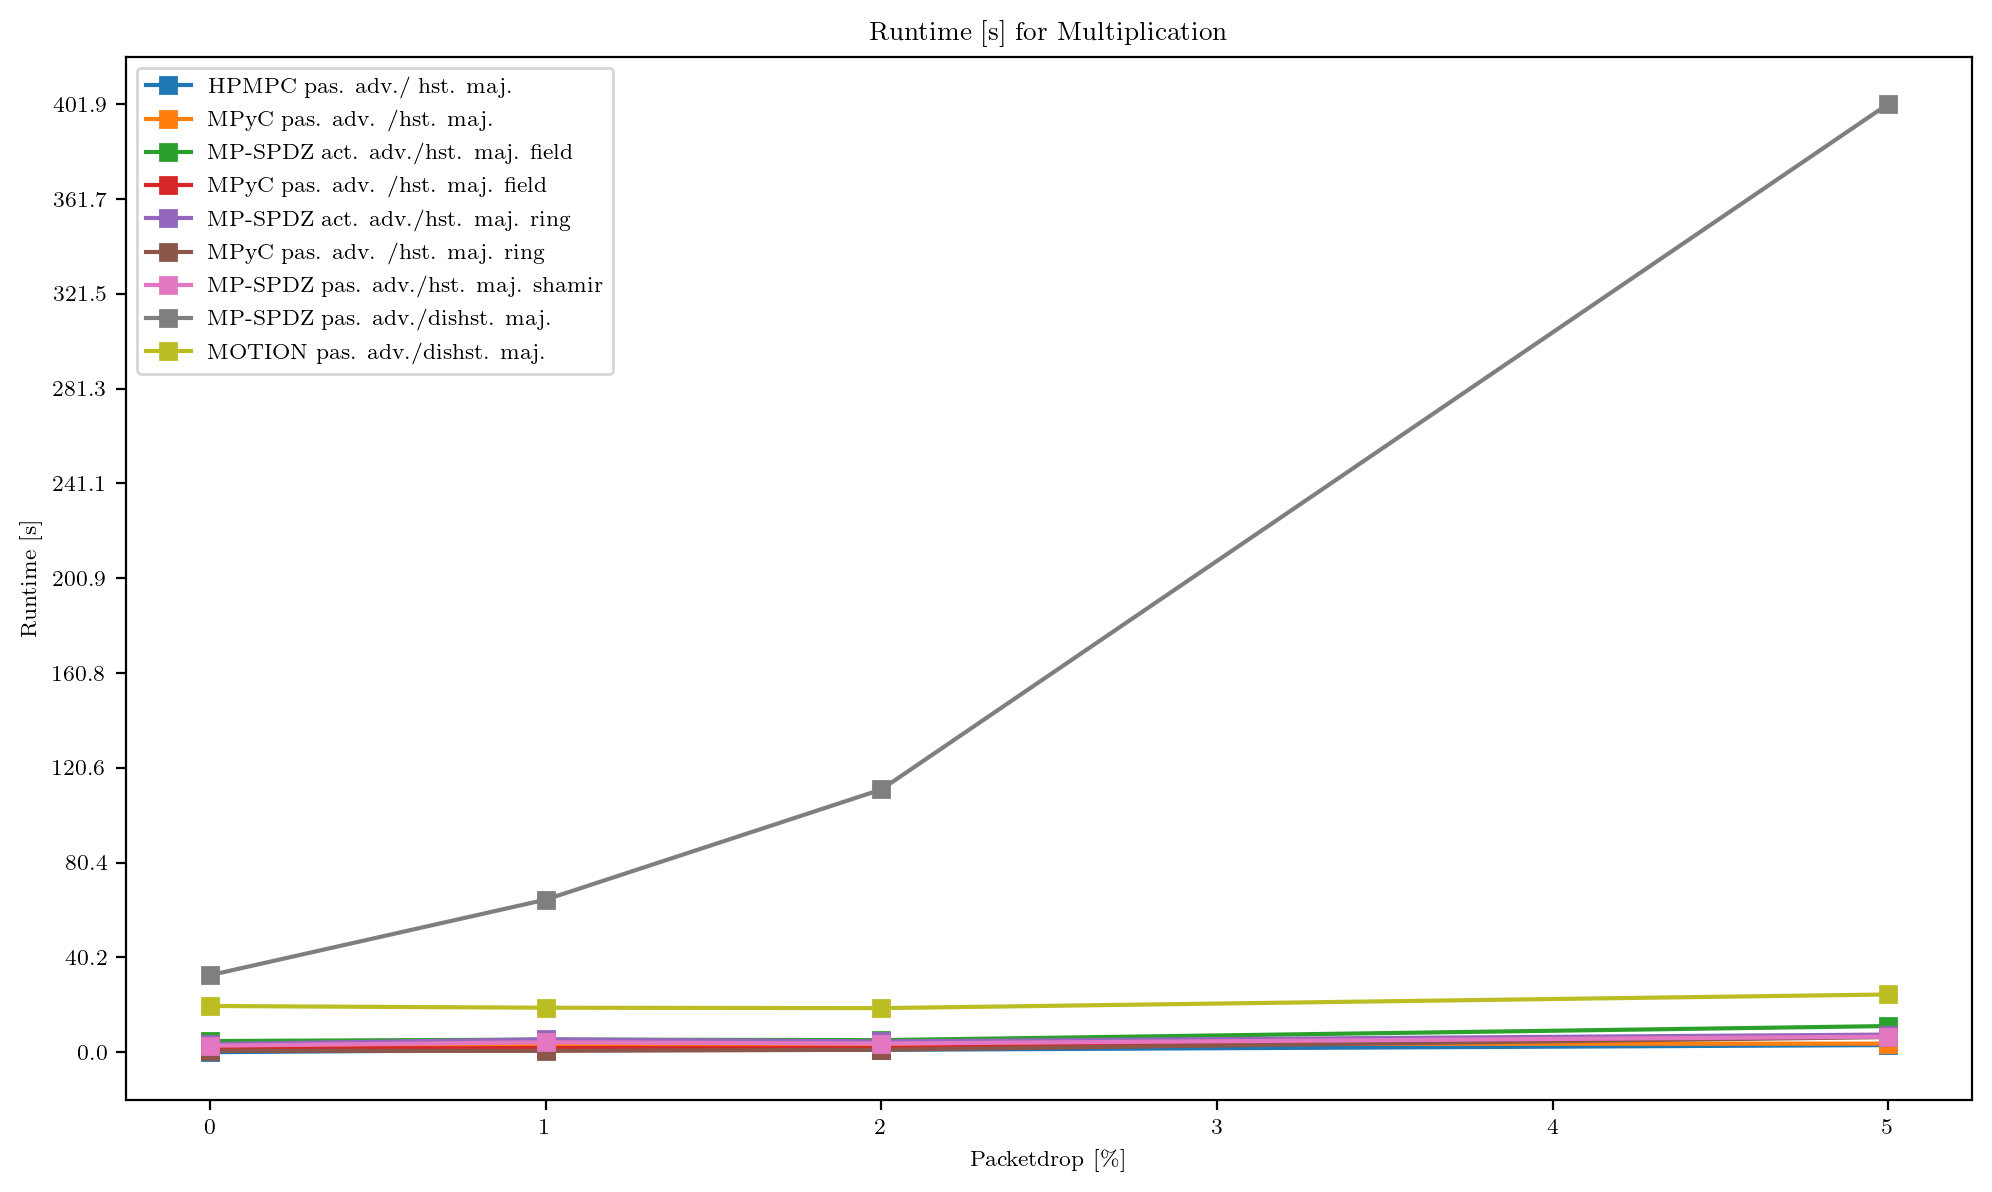

In [103]:
rf.plot_line(x_values,y_values,labels,file_path_packetdrop,experiment,'Packetdrop [\%]',"Runtime [s]")

In [104]:
y_values = []
x_values = []
labels = []
for i in range(len(data)):
    if(data[i]['framework'][0] in 'HPMPC'):
        for function in data[i]['function'].unique():
            if function == 41:
                y_values.append(data[i].loc[(data[i]['function']==function) & (data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['latencies(ms)'] == 0) & (data[i]['preprocess']==0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['packetdrops(%)'].unique()[0:4])
                labels.append("HPMPC passive adversary")
    elif(data[i]['framework'][0] in 'MPyC'):
        y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['latencies(ms)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
        x_values.append(data[i]['packetdrops(%)'].unique()[0:4])
        labels.append("MPyC")
    else:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["boolean_gmw","boolean_gmw","semi2k","arithmetic_gmw","semi-bin","ps-rep-field","ps-rep-ring","ps-rep-shamir","ps-rep-ring"]:
                y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['latencies(ms)'] == 0) & (data[i]['protocol']==protocol), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['packetdrops(%)'].unique()[0:4])
                labels.append(data[i]['framework'][0]+ " " + protocol)

In [105]:
labels

['HPMPC passive adversary',
 'MPyC',
 'MP-SPDZ replicated-field',
 'MP-SPDZ replicated-ring',
 'MP-SPDZ shamir']

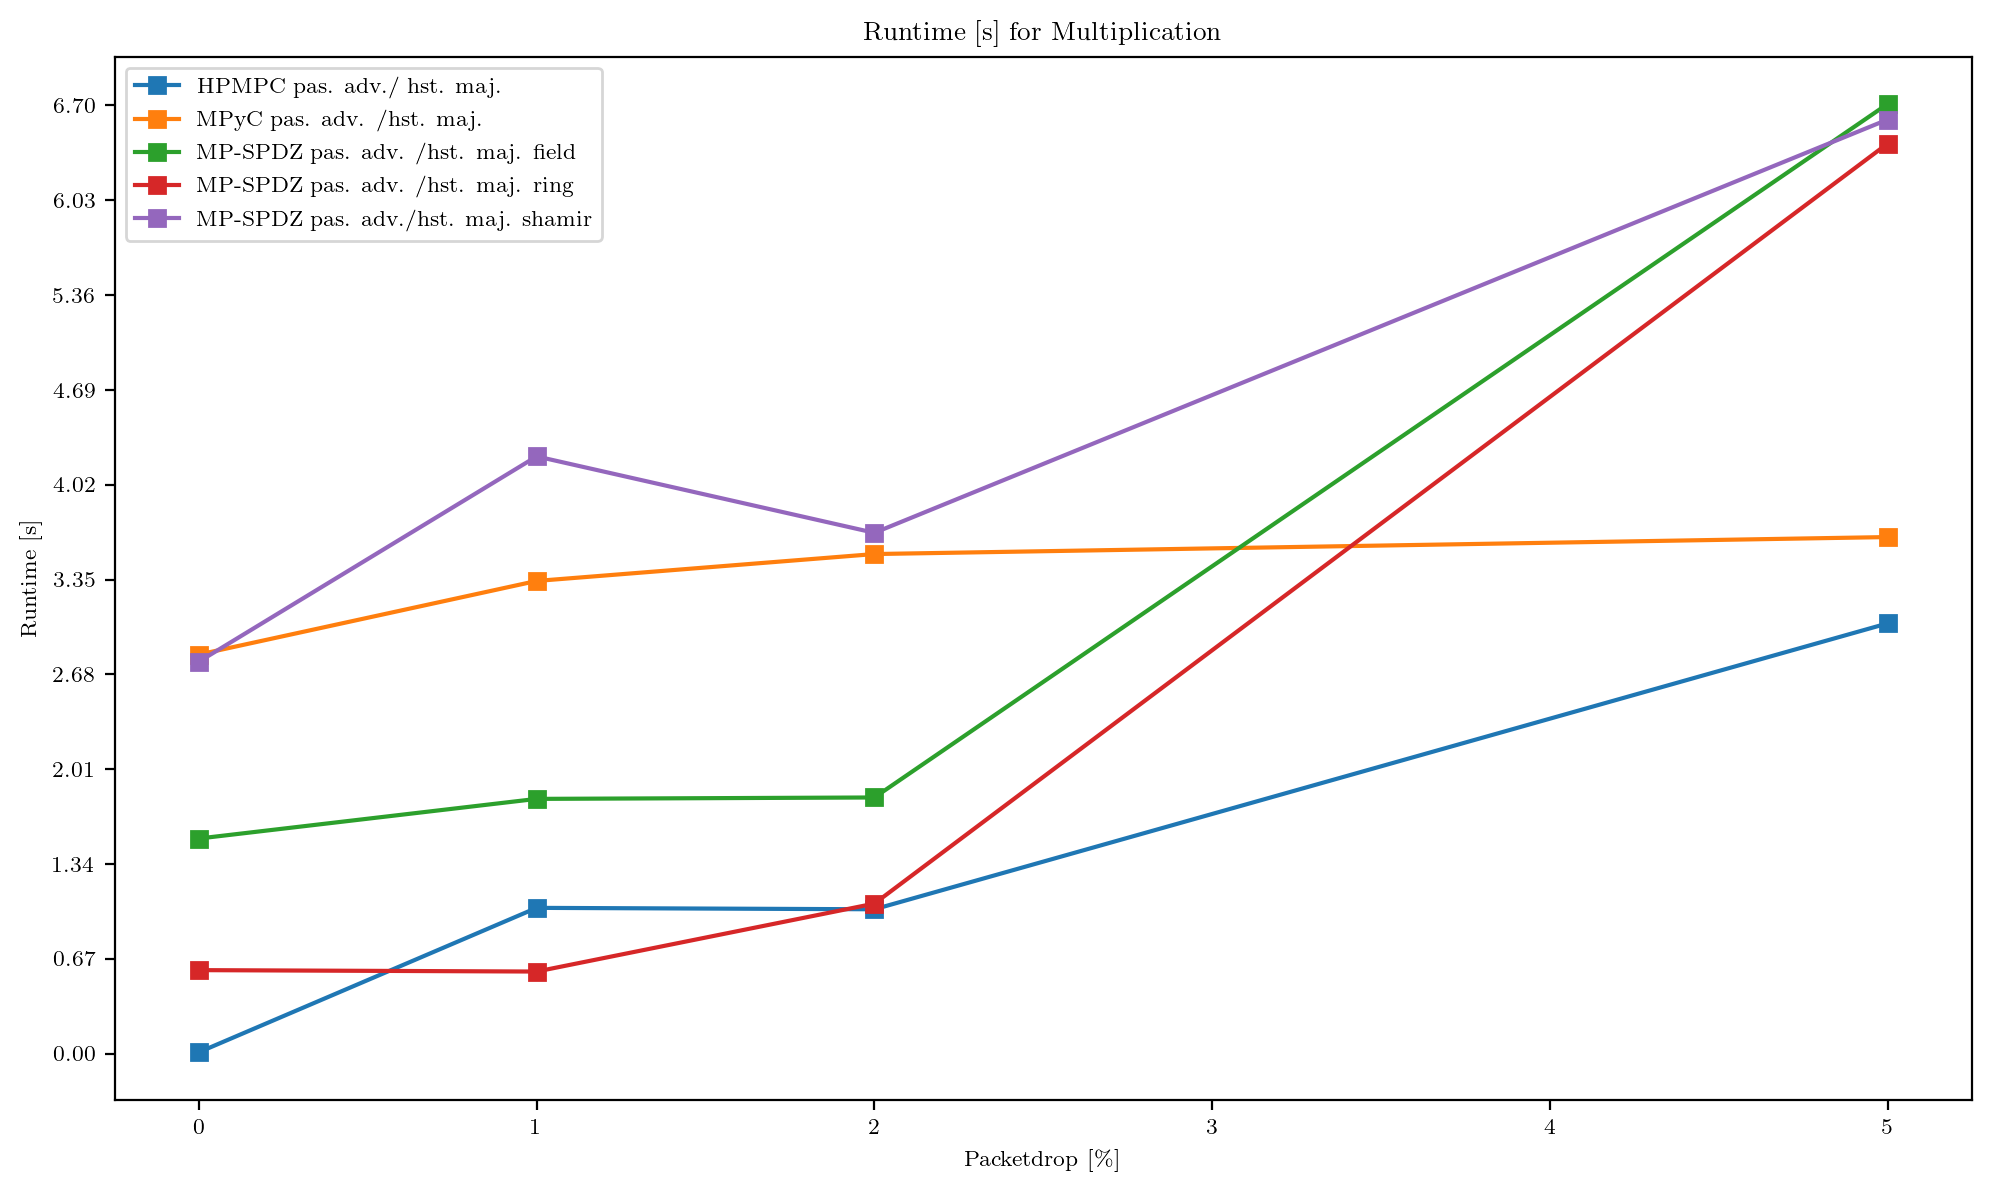

In [107]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv. /hst. maj."
labels[2]="MP-SPDZ pas. adv. /hst. maj. field"
labels[3]="MP-SPDZ pas. adv. /hst. maj. ring"
labels[4]="MP-SPDZ pas. adv./hst. maj. shamir"
rf.plot_line(x_values,y_values,labels,"packetdrop_honest",experiment,x_axis="Packetdrop [\%]",y_axis="Runtime [s]")

In [69]:
y_values = []
x_values = []
labels = []
for i in range(len(data)):
    if(data[i]['framework'][0] in 'HPMPC'):
        for function in data[i]['function'].unique():
            if function == 41:
                y_values.append(data[i].loc[(data[i]['function']==function) & (data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['preprocess']==0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['latencies(ms)'].unique()[0:4])
                labels.append("HPMPC passive adversary")
    elif(data[i]['framework'][0] in 'MPyC'):
        y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
        x_values.append(data[i]['latencies(ms)'].unique()[0:4])
        labels.append("MPyC")
    else:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["arithmetic_gmw","boolean_gmw","semi2k","semi-bin","boolean_bmr","ps-rep-field","ps-rep-ring","ps-rep-shamir","ps-rep-ring"]:
                y_values.append(data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['protocol']==protocol), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['latencies(ms)'].unique()[0:4])
                labels.append(data[i]['framework'][0]+ " " + protocol)


In [70]:
labels

['HPMPC passive adversary',
 'MPyC',
 'MP-SPDZ replicated-field',
 'MP-SPDZ replicated-ring',
 'MP-SPDZ shamir']

In [71]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv. /hst. maj."
labels[2]="MPyC pas. adv. /hst. maj. field"
labels[3]="MPyC pas. adv. /hst. maj. ring"
labels[4]="MP-SPDZ pas. adv./hst. maj. shamir"

In [73]:
y_values

[array([0.009984, 0.289992, 0.559992, 0.84    ]),
 array([2.82, 3.72, 4.27, 4.93]),
 array([1.52, 4.11, 6.87, 9.17]),
 array([0.59, 3.23, 5.78, 8.23]),
 array([ 2.77,  6.09,  8.54, 11.33])]

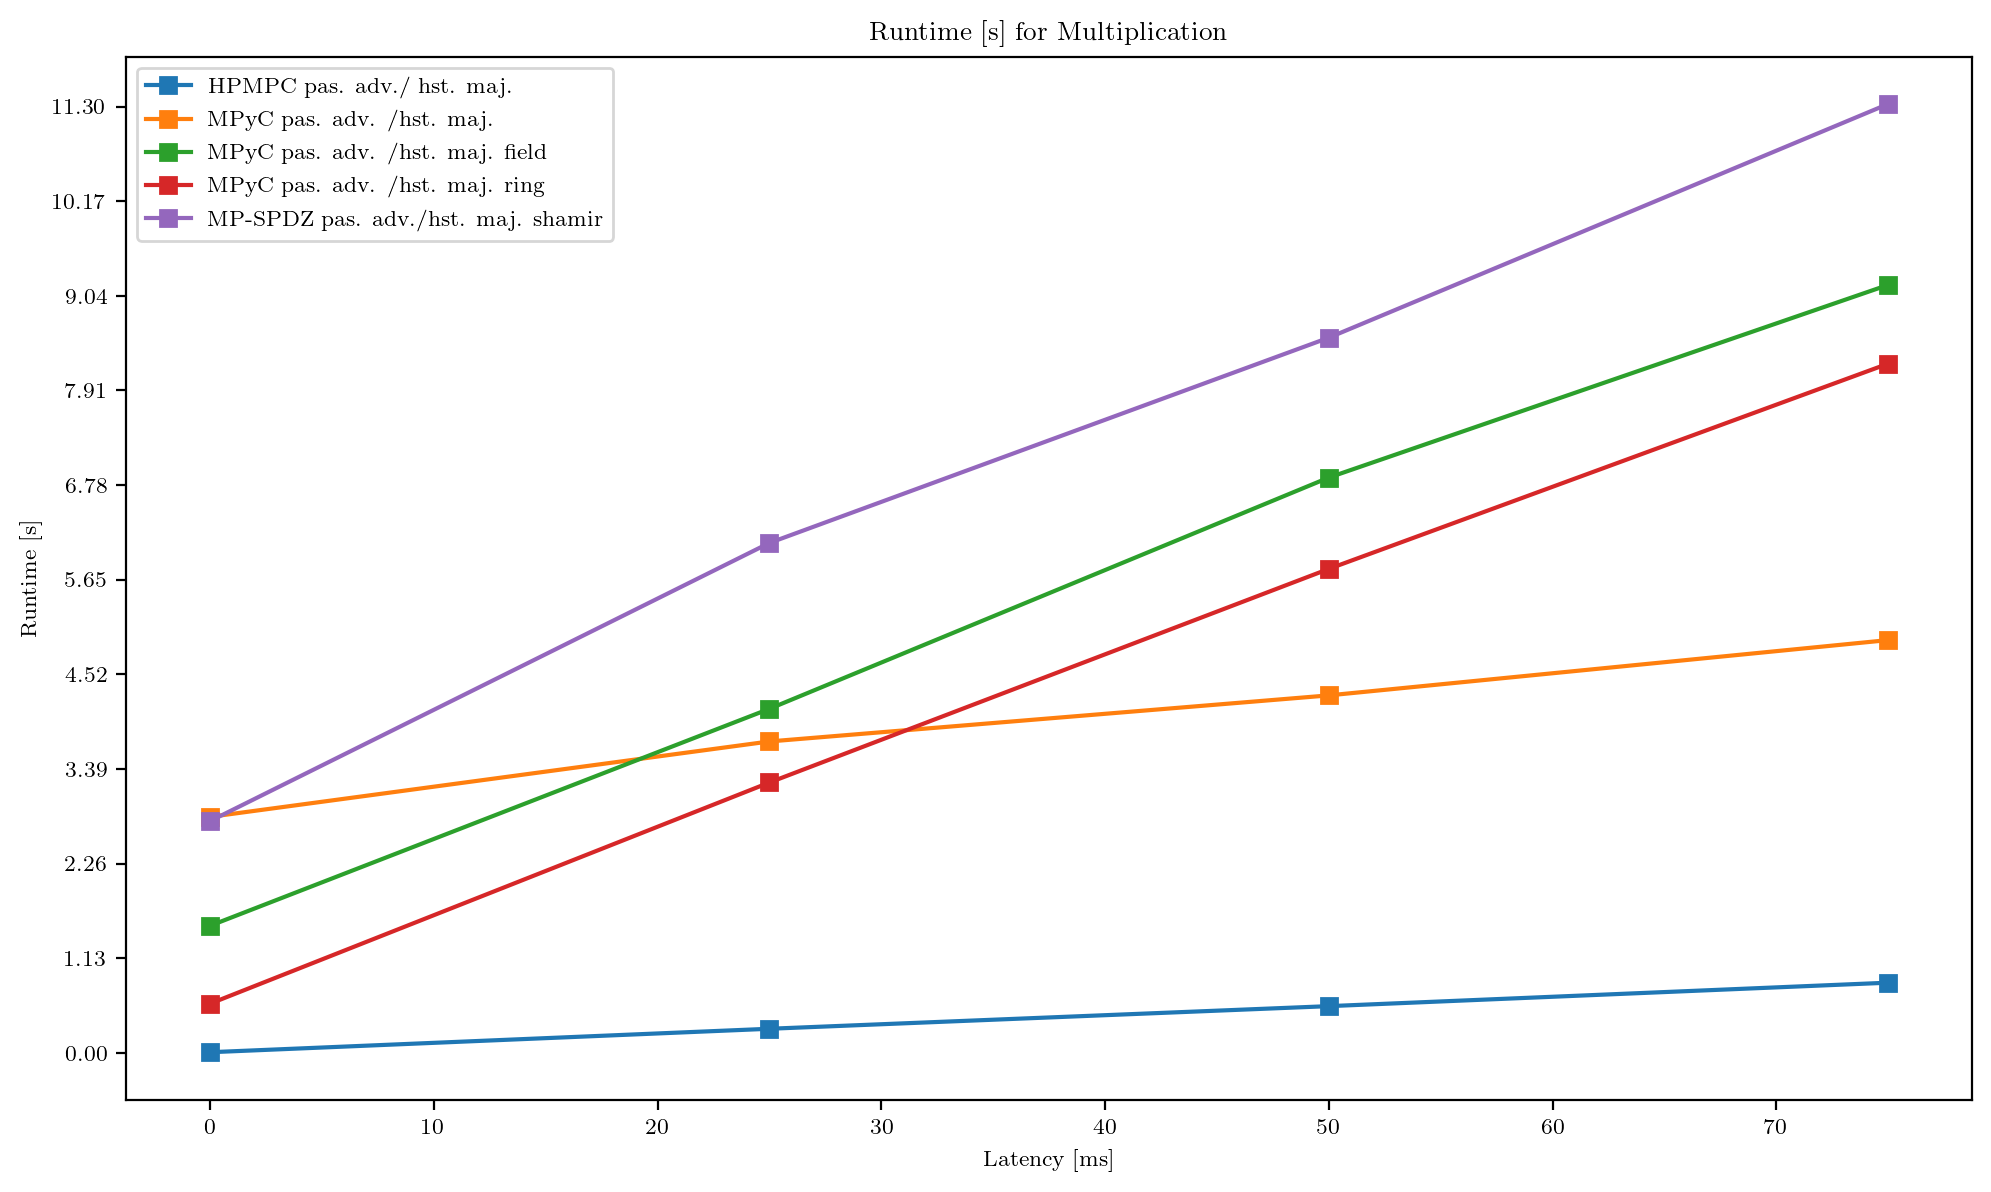

In [72]:
rf.plot_line(x_values,y_values,labels,"latency_honest",experiment,x_axis="Latency [ms]",y_axis="Runtime [s]")

In [114]:
y_values = []
x_values = []
labels = []
for i in range(len(data)):
    if(data[i]['framework'][0] in 'HPMPC'):
        for function in data[i]['function'].unique():
            if function == 41:
                y_values.append(data[i].loc[(data[i]['function']==function) & (data[i]['latencies(ms)'] == 0) & (data[i]['packetdrops(%)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['bandwidths(Mbs)'].unique()[0:4])
                labels.append("HPMPC passive adversary")
    elif(data[i]['framework'][0] in 'MPyC'):
        y_values.append(data[i].loc[(data[i]['latencies(ms)'] == 0) & (data[i]['packetdrops(%)'] == 0), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
        x_values.append(data[i]['bandwidths(Mbs)'].unique()[0:4])
        labels.append("MPyC")
    else:
        for protocol in data[i]['protocol'].unique():
            if protocol not in ["boolean_gmw","boolean_gmw","semi2k","arithmetic_gmw","semi-bin","ps-rep-field","ps-rep-ring","ps-rep-shamir","ps-rep-ring"]:
                y_values.append(data[i].loc[(data[i]['latencies(ms)'] == 0) & (data[i]['packetdrops(%)'] == 0) & (data[i]['protocol']==protocol) & (data[i]['input_size']==100), ['runtime_external(s)']].to_numpy().reshape(-1)[0:4])
                x_values.append(data[i]['bandwidths(Mbs)'].unique()[0:4])
                labels.append(data[i]['framework'][0]+ " " + protocol)


In [116]:
labels[0]="HPMPC pas. adv./ hst. maj."
labels[1]="MPyC pas. adv. /hst. maj."
labels[2]="MP-SPDZ pas. adv./hst. maj. field"
labels[3]="MP-SPDZ pas. adv./hst. maj. ring"
labels[4]="MP-SPDZ pas. adv./hst. maj. shamir"

IndexError: list assignment index out of range

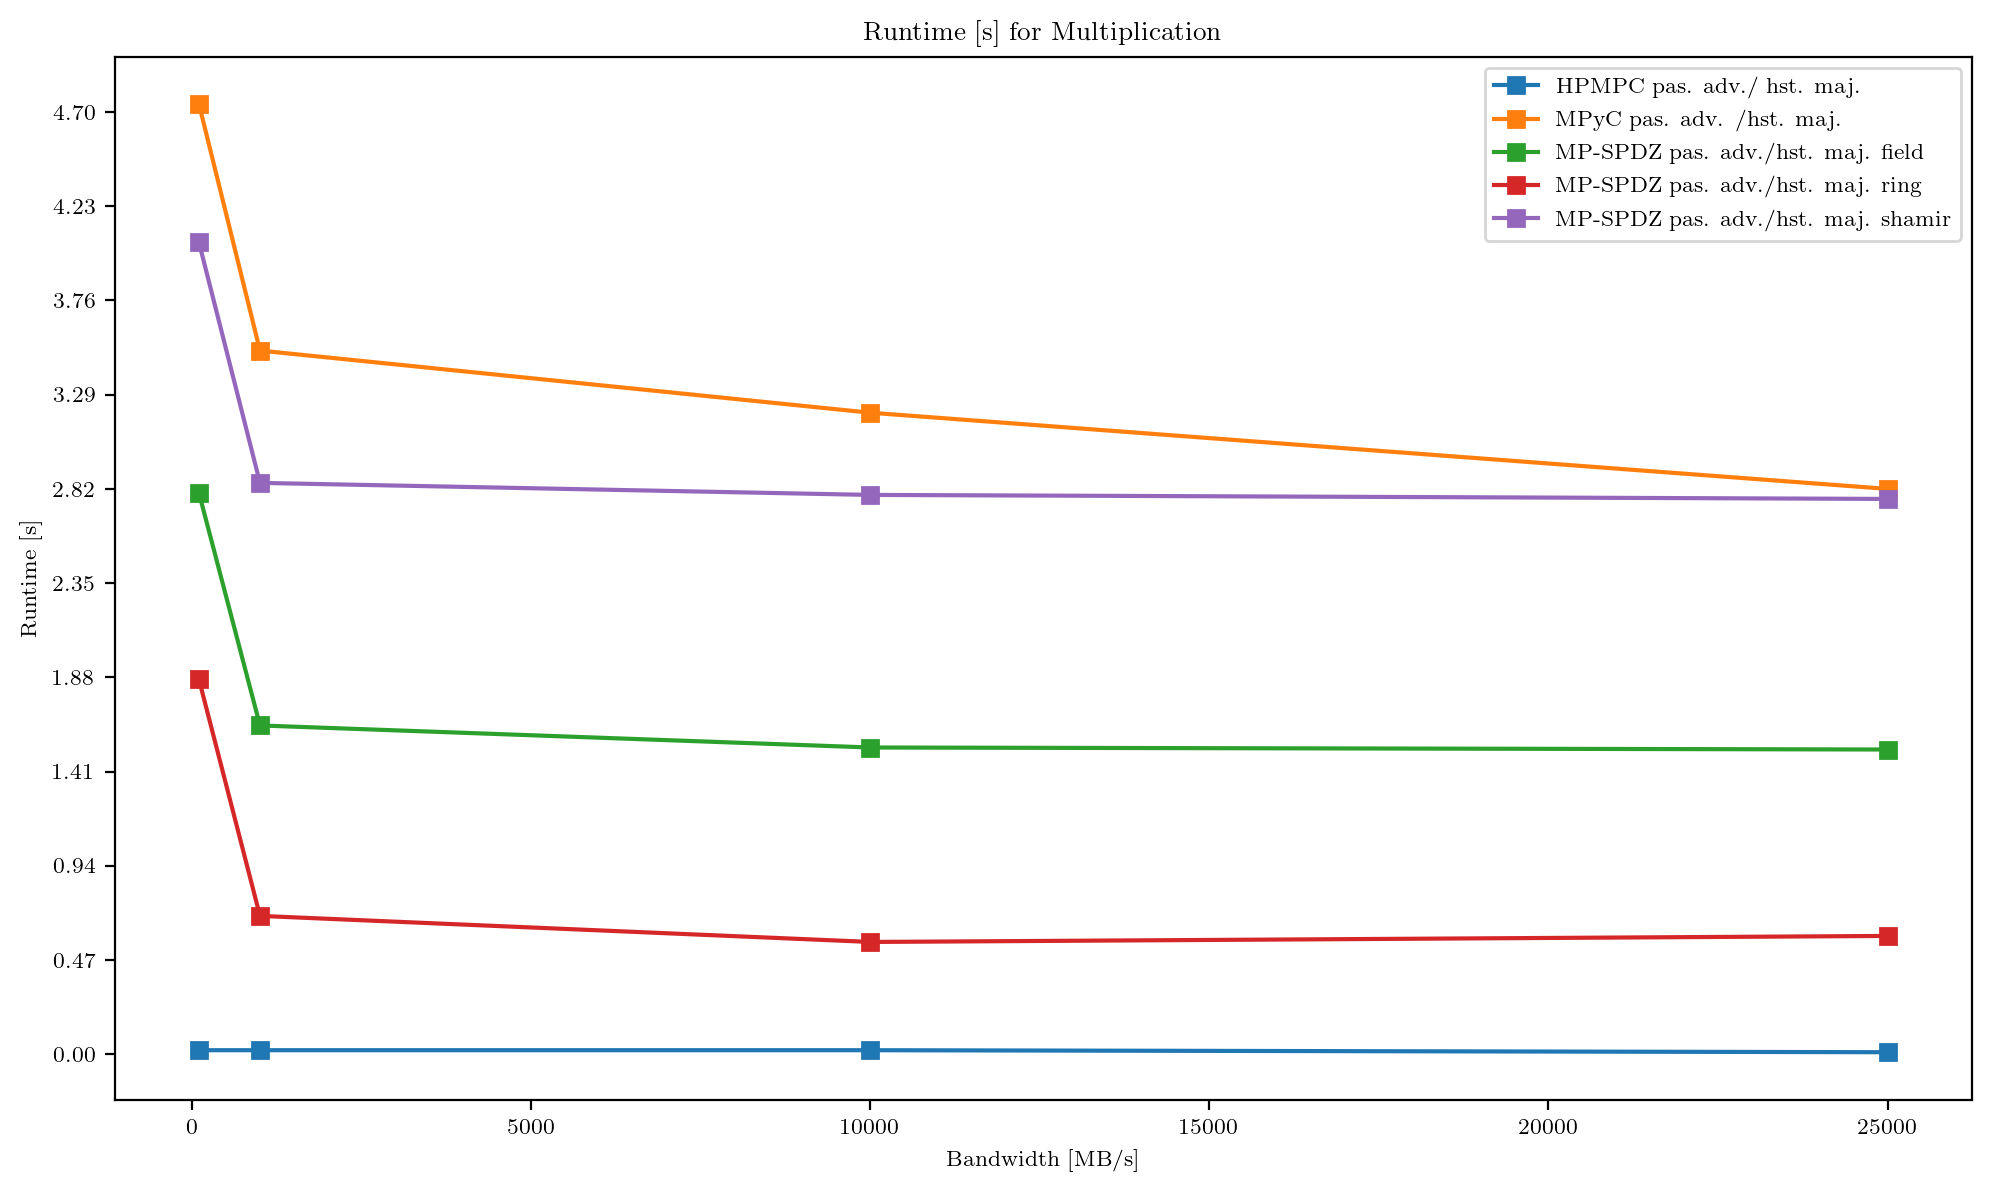

In [78]:
rf.plot_line(x_values,y_values,labels,"bandwidth_honest",experiment,x_axis="Bandwidth [MB/s]",y_axis="Runtime [s]")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


410196


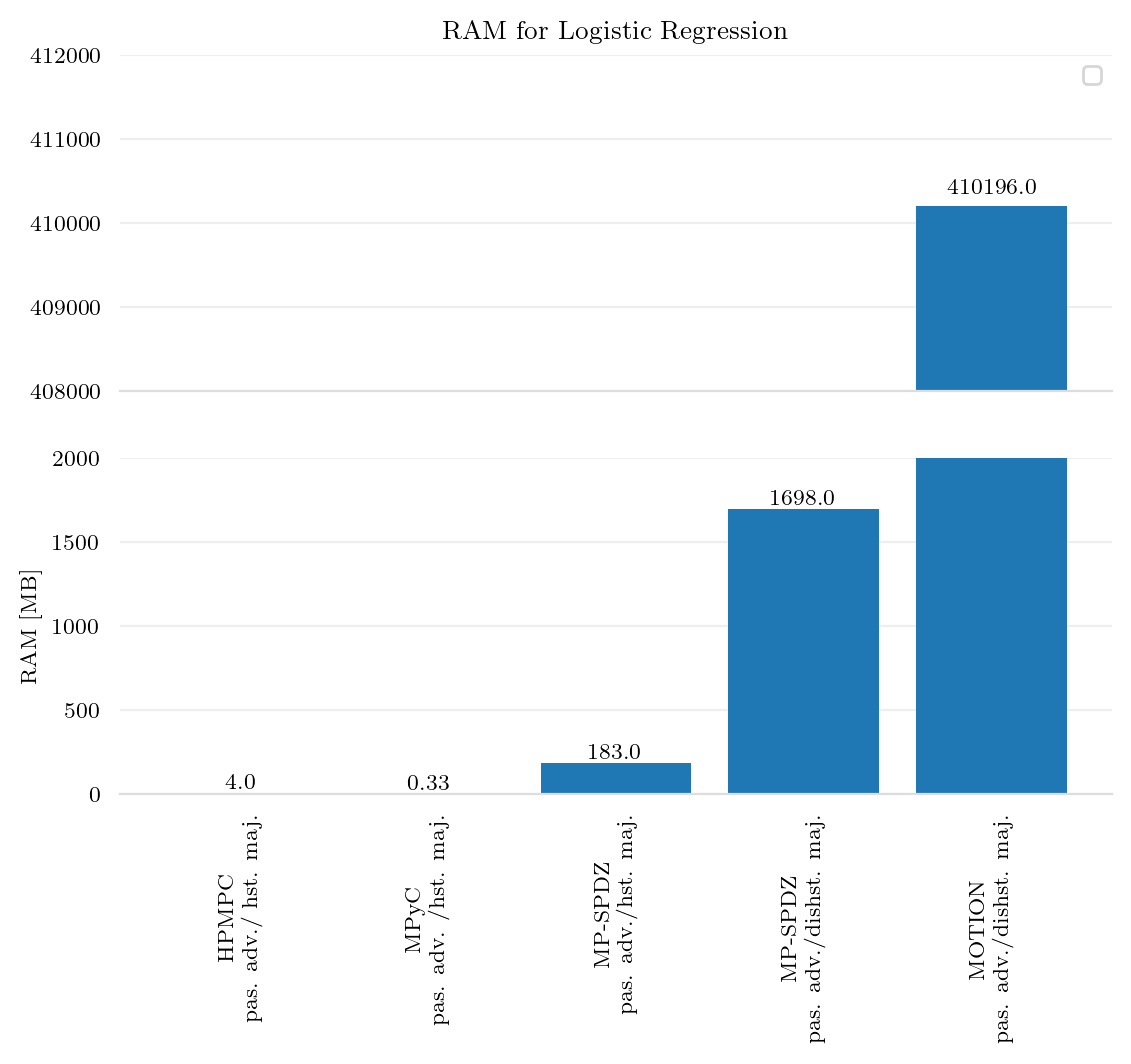

In [113]:
def plot_ram_bar(data,experiment,frameworks):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    values=[]
    labels=[]
    for i in range(len(data)):
        if(i==0):
            date = data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['function']==59)&(data[i]['packetdrops(%)'] == 0) & (data[i]['preprocess']==0) & (data[i]['latencies(ms)'] == 0), ['peakRAM(MiB)']]
            values.append(float(list(date['peakRAM(MiB)'])[0]))
            labels.append(frameworks[i] + ' honest majority')
        elif(i==2 or i==3):
            for protocol in data[i]['protocol'].unique():
                date = data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['protocol']==protocol) & (data[i]['latencies(ms)'] == 0), ['peakRAM(MiB)']]
                values.append(round(list(date['peakRAM(MiB)'])[0],2))
                labels.append(frameworks[i]+' '+str(protocol))
        else:
            date = data[i].loc[(data[i]['bandwidths(Mbs)'] == 25000) & (data[i]['packetdrops(%)'] == 0) & (data[i]['latencies(ms)'] == 0), ['RAMused(MB)']]
            values.append(round(list(date['RAMused(MB)'])[0],2))
            labels.append(frameworks[i])
    #ax.set_yscale('log')  # Set y-axis as logarithmic
    labels[0]="HPMPC \n pas. adv./ hst. maj."
    labels[1]="MPyC \n pas. adv. /hst. maj."
    labels[2]="MP-SPDZ \n pas. adv./hst. maj."
    labels[3]="MP-SPDZ \n pas. adv./dishst. maj."
    labels[4]="MOTION \n pas. adv./dishst. maj."
    labels
    bars=ax1.bar(labels,values)
    bars2=ax2.bar(labels,values)
    ax2.set_ylabel('RAM [MB]')
    ax1.set_title('RAM for Logistic Regression')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_color('#DDDDDD')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_color('#DDDDDD')

    # Second, remove the ticks as well.
    ax1.tick_params(bottom=False, left=False)
    ax2.tick_params(bottom=False, left=False)
    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(True, color='#EEEEEE')
    ax1.xaxis.grid(False)
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(True, color='#EEEEEE')
    ax2.xaxis.grid(False)
    # Rotate labels
    print(values[-1])
    ax1.legend()
    ax1.set_ylim(408000,412000)
    ax2.set_ylim(0,2000)
    # Add values on top of bars
    for bar in bars2[:-1]:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom',weight='bold')
    yval = bars[-1].get_height()
    plt.text(bars[-1].get_x() + bars[-1].get_width()/2, yval-406650 + 0.05, yval, ha='center', va='bottom',weight='bold')
    # zoom-in / limit the view to different portions of the data
    plt.xticks(rotation='vertical')
    plt.savefig(experiment+'_RAM_bar.png',dpi=300,bbox_inches='tight')
    plt.show()
plot_ram_bar(data,experiment,frameworks)

In [117]:
y_values_basic=[]
x_values=[]
y_values_basic.append(data[0].loc[(data[0]['bandwidths(Mbs)'] == 25000) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) &(data[0]['preprocess']==0) & (data[0]['function']==59) , ['runtime_external(s)']].to_numpy()[0][0])
x_values.append('HPMPC passive adversary')
y_values_basic.append(data[1].loc[(data[1]['bandwidths(Mbs)'] == 25000) & (data[1]['packetdrops(%)'] == 0) & (data[1]['latencies(ms)'] == 0) , ['runtime_external(s)']].to_numpy()[0][0])
x_values.append('MPyC')
for protocol in data[2]['protocol'].unique():
    y_values_basic.append(data[2].loc[(data[2]['bandwidths(Mbs)'] == 25000) & (data[2]['packetdrops(%)'] == 0) & (data[2]['protocol']==protocol) & (data[2]['latencies(ms)'] == 0), ['runtime_external(s)']].to_numpy()[0][0])
    x_values.append('MP-SPDZ '+protocol)
for protocol in data[3]['protocol'].unique():
    y_values_basic.append(data[3].loc[(data[3]['input_size'] == 100) &(data[3]['bandwidths(Mbs)'] == 25000) & (data[3]['packetdrops(%)'] == 0) & (data[3]['protocol']==protocol) & (data[3]['latencies(ms)'] == 0), ['runtime_external(s)']].to_numpy()[0][0])
    if protocol == "boolean_gmw":
        x_values.append('MOTION boolean gmw')
    else:
        x_values.append('Motion boolean bmr')

In [118]:
x_values

['HPMPC passive adversary',
 'MPyC',
 'MP-SPDZ replicated-ring',
 'MP-SPDZ semi2k',
 'MOTION boolean gmw']

In [119]:
labels=x_values
labels[0]="HPMPC \n pas. adv./ hst. maj."
labels[1]="MPyC \n pas. adv. /hst. maj."
labels[2]="MP-SPDZ \n pas. adv./hst. maj."
labels[3]="MP-SPDZ \n pas. adv./dishst. maj."
labels[4]="MOTION \n pas. adv./dishst. maj."
labels

['HPMPC \n pas. adv./ hst. maj.',
 'MPyC \n pas. adv. /hst. maj.',
 'MP-SPDZ \n pas. adv./hst. maj.',
 'MP-SPDZ \n pas. adv./dishst. maj.',
 'MOTION \n pas. adv./dishst. maj.']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


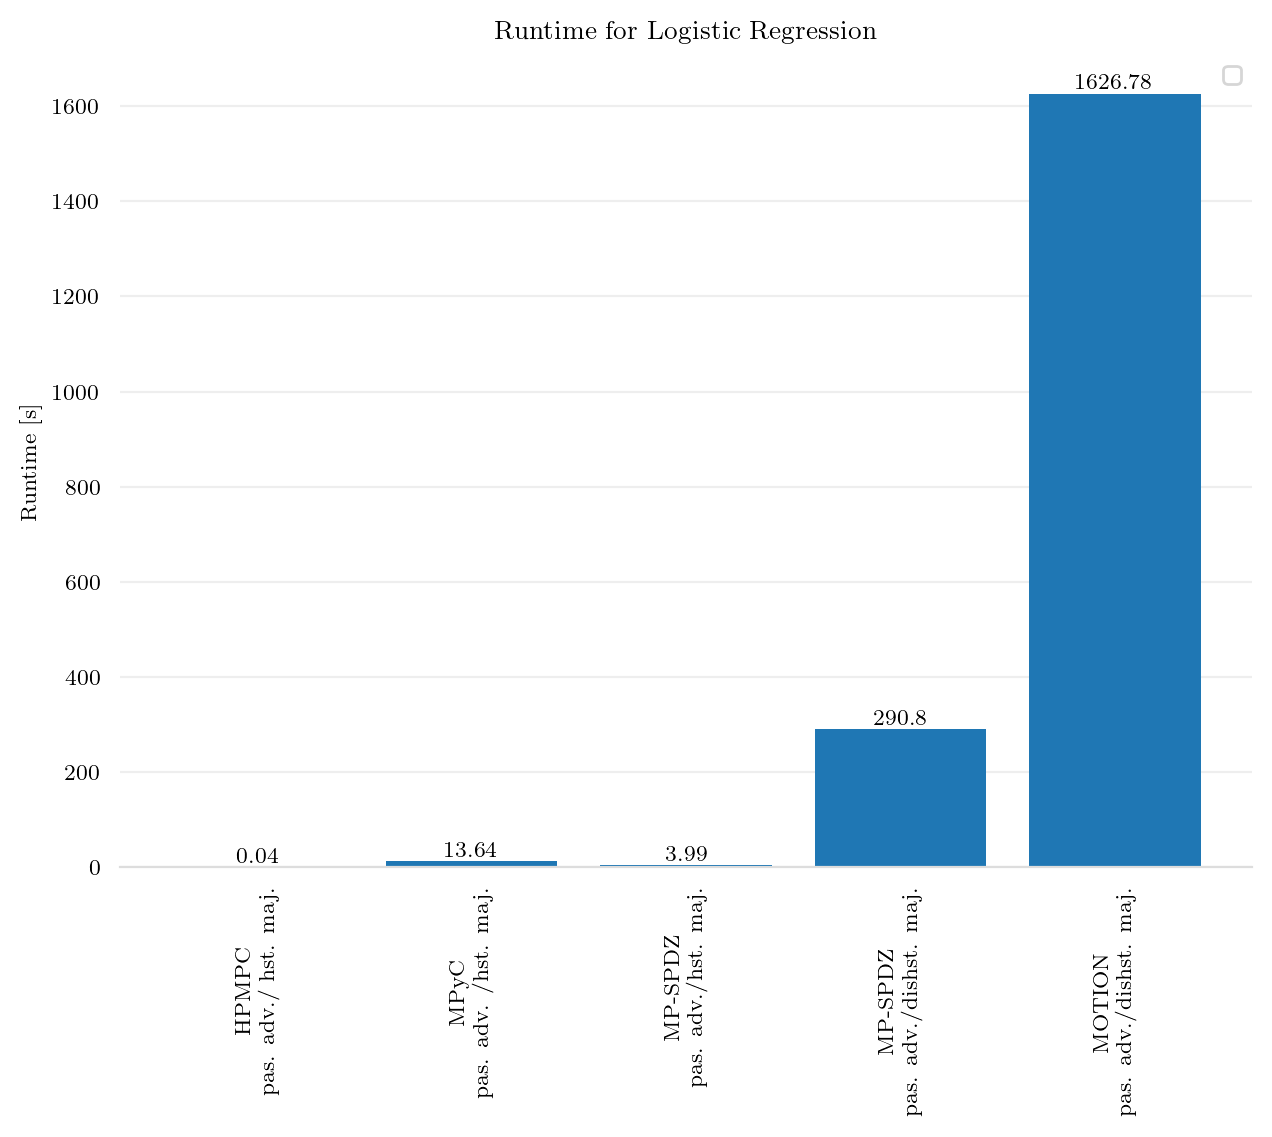

In [120]:
rf.basic_bar_plot(y_values_basic,labels,experiment,'Runtime for Logistic Regression','Runtime [s]')

In [30]:
data[3].loc[(data[3]['bandwidths(Mbs)'] == 25000)  &(data[3]['packetdrops(%)'] == 0)  & (data[3]['latencies(ms)'] == 0), ['runtime_external(s)']]

,runtime_external(s)
0,19.6
